<a href="https://colab.research.google.com/github/svishakan/Social-Network-Analysis/blob/main/NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NetworkX Demo

In [ ]:
#Imports
import os
import networkx.generators.small
import networkx as nx
import matplotlib.pyplot as plt
from networkx import algorithms

## Krackhardt Kite Graph

In [ ]:
G1 = networkx.generators.small.krackhardt_kite_graph()

In [ ]:
#Information
print(nx.info(G1))

Graph named 'Krackhardt Kite Social Network' with 10 nodes and 18 edges


In [ ]:
#Number of Edges
G1.number_of_edges()

18

In [ ]:
#Number of Nodes
G1.number_of_nodes()

10

In [ ]:
#Adjacency List
dict((x, list(G1.neighbors(x))) for x in G1.nodes())

{0: [1, 2, 3, 5],
 1: [0, 3, 4, 6],
 2: [0, 3, 5],
 3: [0, 1, 2, 4, 5, 6],
 4: [1, 3, 6],
 5: [0, 2, 3, 6, 7],
 6: [1, 3, 4, 5, 7],
 7: [5, 6, 8],
 8: [7, 9],
 9: [8]}

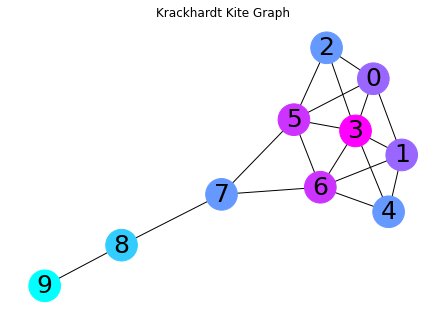

In [ ]:
#Visual Representation
node_color = [G1.degree(v) for v in G1]
nx.draw(G1, with_labels=True, node_size=1000, node_shape='o', 
        node_color=node_color, font_size=25, cmap=plt.cm.cool)
plt.title("Krackhardt Kite Graph")
plt.show()

In [ ]:
#DFS Traversal
list(nx.dfs_edges(G1, source=0))

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]

In [ ]:
#DFS Tree
list(nx.dfs_tree(G1, source=0).edges())

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]

In [ ]:
#DFS Sucessors
nx.dfs_successors(G1, source=0)

{0: [1], 1: [3], 2: [5], 3: [2], 5: [6], 6: [4, 7], 7: [8], 8: [9]}

In [ ]:
#Shortest Path from Source to Destination
algorithms.shortest_path(G1, 1, 9)

[1, 6, 7, 8, 9]

In [ ]:
#Average Shortest Path Length
print("Average Shortest Path Length of G1:", round(algorithms.average_shortest_path_length(G1), 2))

Average Shortest Path Length of G1: 1.98


In [ ]:
#Degree Centrality = Degree of Node / N - 1
degree_centralities = nx.degree_centrality(G1)

for node in degree_centralities.keys():
    degree_centralities[node] = round(degree_centralities[node], 2)

print(degree_centralities)

{0: 0.44, 1: 0.44, 2: 0.33, 3: 0.67, 4: 0.33, 5: 0.56, 6: 0.56, 7: 0.33, 8: 0.22, 9: 0.11}


In [ ]:
#Betweenness Centrality (For Node 8: 8/36 = 0.22)
# ([N-1][N-2]/2 = 36, 8 is the no. of times Node 8 is included 
# in shortest paths for all node combinations other than it as source/dest)
betweenness_centralities = nx.betweenness_centrality(G1)

for node in betweenness_centralities.keys():
    betweenness_centralities[node] = round(betweenness_centralities[node], 2)

print(betweenness_centralities)

{0: 0.02, 1: 0.02, 2: 0.0, 3: 0.1, 4: 0.0, 5: 0.23, 6: 0.23, 7: 0.39, 8: 0.22, 9: 0.0}


In [ ]:
#Edge Betweenness Centrality 
# Fraction of edge that contains them / Set of all Shortest Paths in Graph
edge_between_centralities = nx.edge_betweenness_centrality(G1)

for node in edge_between_centralities.keys():
    edge_between_centralities[node] = round(edge_between_centralities[node], 2)

print(edge_between_centralities)

{(0, 1): 0.06, (0, 2): 0.03, (0, 3): 0.04, (0, 5): 0.1, (1, 3): 0.04, (1, 4): 0.03, (1, 6): 0.1, (2, 3): 0.07, (2, 5): 0.1, (3, 4): 0.07, (3, 5): 0.07, (3, 6): 0.07, (4, 6): 0.1, (5, 6): 0.06, (5, 7): 0.23, (6, 7): 0.23, (7, 8): 0.36, (8, 9): 0.2}


In [ ]:
#Cliques
#For node N, a maximal clique for N is a largest complete subgraph containing N
list(nx.find_cliques(G1))

[[8, 9], [8, 7], [3, 0, 1], [3, 0, 2, 5], [3, 4, 1, 6], [3, 6, 5], [7, 5, 6]]

In [ ]:
#Eccentricity
#The eccentricity of node N is the max. distance from N to all other nodes in G
nx.eccentricity(G1)

{0: 4, 1: 4, 2: 4, 3: 4, 4: 4, 5: 3, 6: 3, 7: 2, 8: 3, 9: 4}

In [ ]:
#Diameter
#The diameter is the maximum eccentricity.
nx.diameter(G1)

4

In [ ]:
#Center
#The center is the set of nodes with eccentricity equal to radius.
nx.center(G1)

[7]

In [ ]:
#Periphery
#The periphery is the set of nodes with eccentricity equal to the diameter
nx.periphery(G1)

[0, 1, 2, 3, 4, 9]

In [ ]:
#Bridges
list(nx.bridges(G1))

[(7, 8), (8, 9)]

In [ ]:
#Node Connectivity
#Min. number of edges that must be removed to disconnect G or render it trivial.
nx.node_connectivity(G1)

1

In [ ]:
#Edge Connectivity
#Min. number of nodes that must be removed to disconnect G or render it trivial.
nx.edge_connectivity(G1)

1

In [ ]:
#Is G1 Eulerian?
#A graph is Eulerian if it has an Eulerian circuit. 
#Eulerian circuit: A closed walk that includes each edge of a graph exactly once
print("G1 is Eulerian:", nx.is_eulerian(G1))

G1 is Eulerian: False


In [ ]:
#Convert to Eulerian Graph
G2 = nx.eulerize(G1)
G2.number_of_edges() #Edges(G1) = 18

22

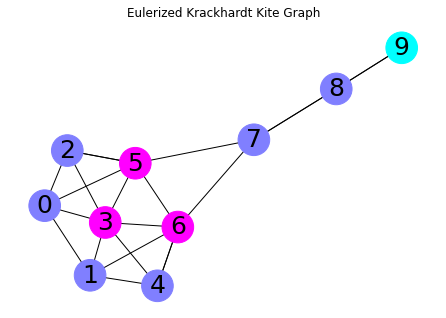

In [ ]:
node_color = [G2.degree(v) for v in G2]
nx.draw(G2, with_labels=True, node_size=1000, node_shape='o', 
        node_color=node_color, font_size=25, cmap=plt.cm.cool)
plt.title("Eulerized Krackhardt Kite Graph")
plt.show()

In [ ]:
#Is G2 Eulerian?
print("G2 is Eulerian:", nx.is_eulerian(G2))

G2 is Eulerian: True


In [ ]:
print(list(nx.eulerian_path(G2)))

[(0, 1), (1, 3), (3, 0), (0, 2), (2, 3), (3, 4), (4, 1), (1, 6), (6, 3), (3, 5), (5, 2), (2, 5), (5, 6), (6, 4), (4, 6), (6, 7), (7, 8), (8, 9), (9, 8), (8, 7), (7, 5), (5, 0)]


In [ ]:
#Jaccard Coefficient
list(nx.jaccard_coefficient(G1))

[(0, 4, 0.4),
 (0, 6, 0.5),
 (0, 7, 0.16666666666666666),
 (0, 8, 0.0),
 (0, 9, 0.0),
 (1, 2, 0.4),
 (1, 5, 0.5),
 (1, 7, 0.16666666666666666),
 (1, 8, 0.0),
 (1, 9, 0.0),
 (2, 4, 0.2),
 (2, 6, 0.3333333333333333),
 (2, 7, 0.2),
 (2, 8, 0.0),
 (2, 9, 0.0),
 (3, 8, 0.0),
 (3, 9, 0.0),
 (3, 7, 0.2857142857142857),
 (4, 8, 0.0),
 (4, 9, 0.0),
 (4, 5, 0.3333333333333333),
 (4, 7, 0.2),
 (5, 8, 0.16666666666666666),
 (5, 9, 0.0),
 (6, 8, 0.16666666666666666),
 (6, 9, 0.0),
 (7, 9, 0.3333333333333333)]

In [ ]:
#Single Source Shortest Paths
paths = nx.single_source_shortest_path(G1, source=0)

for node in paths.keys():
    print("0 to", node, ":", paths[node])

0 to 0 : [0]
0 to 1 : [0, 1]
0 to 2 : [0, 2]
0 to 3 : [0, 3]
0 to 5 : [0, 5]
0 to 4 : [0, 1, 4]
0 to 6 : [0, 1, 6]
0 to 7 : [0, 5, 7]
0 to 8 : [0, 5, 7, 8]
0 to 9 : [0, 5, 7, 8, 9]


In [ ]:
#Closeness Centrality
#(N-1 / Sum of distance from node to all other nodes)

closeness_centralities = nx.eigenvector_centrality(G1)

for node in closeness_centralities.keys():
    closeness_centralities[node] = round(closeness_centralities[node], 2)

print(closeness_centralities)

{0: 0.35, 1: 0.35, 2: 0.29, 3: 0.48, 4: 0.29, 5: 0.4, 6: 0.4, 7: 0.2, 8: 0.05, 9: 0.01}


In [ ]:
#PageRank Centrality
#Determined based on incoming links
pageranks = nx.pagerank(G1)

for node in pageranks.keys():
    pageranks[node] = round(pageranks[node], 2)

print(pageranks)

{0: 0.1, 1: 0.1, 2: 0.08, 3: 0.15, 4: 0.08, 5: 0.13, 6: 0.13, 7: 0.1, 8: 0.09, 9: 0.05}


In [ ]:
#Eigen Vector Centrality
eigen_centrality = nx.eigenvector_centrality(G1)

for node in eigen_centrality.keys():
    eigen_centrality[node] = round(eigen_centrality[node], 2)

print(eigen_centrality)

{0: 0.35, 1: 0.35, 2: 0.29, 3: 0.48, 4: 0.29, 5: 0.4, 6: 0.4, 7: 0.2, 8: 0.05, 9: 0.01}


## Directed Graph

In [ ]:
#Directed Graph
G3 = networkx.generators.gn_graph(10)

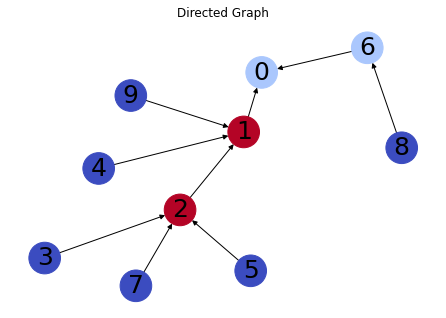

In [ ]:
node_color = [G3.degree(v) for v in G3]
nx.draw(G3, with_labels=True, node_size=1000, node_shape='o', 
        node_color=node_color, font_size=25, cmap=plt.cm.coolwarm)
plt.title("Directed Graph")
plt.show()

In [ ]:
#Hamiltonian Path
nx.algorithms.tournament.hamiltonian_path(G3)

[1, 0, 3, 2, 4, 5, 8, 9, 6, 7]

In [ ]:
#Strong Connectivity
#If and only if every vertex in the graph is reachable from every other vertex.
nx.is_strongly_connected(G3)

False

In [ ]:
#Weak Connectivity
#If and only if the graph is connected when the edge direction is ignored.
nx.is_weakly_connected(G3)

True

In [ ]:
#All Pairs Shortest Paths
list(nx.all_pairs_dijkstra_path(G3))

[(0, {0: [0]}),
 (1, {0: [1, 0], 1: [1]}),
 (2, {0: [2, 1, 0], 1: [2, 1], 2: [2]}),
 (3, {0: [3, 2, 1, 0], 1: [3, 2, 1], 2: [3, 2], 3: [3]}),
 (4, {0: [4, 1, 0], 1: [4, 1], 4: [4]}),
 (5, {0: [5, 2, 1, 0], 1: [5, 2, 1], 2: [5, 2], 5: [5]}),
 (6, {0: [6, 0], 6: [6]}),
 (7, {0: [7, 2, 1, 0], 1: [7, 2, 1], 2: [7, 2], 7: [7]}),
 (8, {0: [8, 6, 0], 6: [8, 6], 8: [8]}),
 (9, {0: [9, 1, 0], 1: [9, 1], 9: [9]})]

In [ ]:
#Is Bipartite?
nx.is_bipartite(G3)

True

In [ ]:
#Bipartite Node Sets
nx.bipartite.sets(G3)

({1, 3, 5, 6, 7}, {0, 2, 4, 8, 9})

## Directed Graph - File I/O

In [ ]:
data_file = open("data.txt", "w")

edges = ["Kolkata Mumbai 2031\n",
        "Mumbai Pune 155\n",
        "Mumbai Goa 571\n",
        "Kolkata Delhi 1492\n",
        "Kolkata Bhubaneshwar 444\n",
        "Mumbai Delhi 1424\n",
        "Delhi Chandigarh 243\n",
        "Delhi Surat 1208\n",
        "Kolkata Hyderabad 1495\n",
        "Hyderabad Chennai 626\n",
        "Chennai Trivandrum 773\n",
        "Trivandrum Hyderabad 1299\n",
        "Kolkata Varanasi 679\n",
        "Delhi Varanasi 821\n",
        "Mumbai Bangalore 984\n",
        "Chennai Bangalore 347\n",
        "Hyderabad Bangalore 575\n",
        "Kolkata Guwahati 1031\n"]

data_file.writelines(edges)

data_file.close()

In [ ]:
G4 = nx.read_weighted_edgelist("data.txt", delimiter=" ")

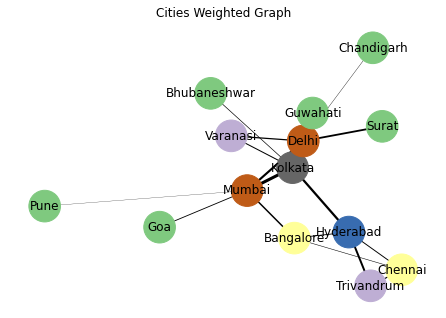

In [ ]:
node_color = [G4.degree(v) for v in G4]
edge_width = [0.0015 * G4[u][v]['weight'] for u, v in G4.edges()]

nx.draw(G4, with_labels=True, node_size=1000, node_shape='o', width=edge_width,
        node_color=node_color, cmap=plt.cm.Accent)
plt.title("Cities Weighted Graph")
plt.show()